# Health Insurance Multiple Regression

In [5]:
pip install xlrd

In [44]:
import pandas as pd

df = pd.read_csv('E:/MLCourse/Datasets/health_insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# First, let's see what we actually have in the dataframe
# print("=== Dataframe Info ===")
# print("\nShape:", df.shape)
# print("\nColumn names:")
# print(df.columns.tolist())
# print("\nFirst few rows:")
# print(df.head())
# print("\nData types:")
# print(df.dtypes)


=== Dataframe Info ===

Shape: (1338, 7)

Column names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# Convert categorical variables to numeric (with robust handling)

# Check which columns need conversion
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# print(f"Categorical columns found: {categorical_cols}")

# Convert each categorical column
if 'smoker' in df.columns:
    # print("\nConverting 'smoker' column...")
    # print(f"Original unique values: {df['smoker'].unique()}")
    # Handle different capitalizations and whitespace
    df['smoker'] = df['smoker'].astype(str).str.strip().str.lower()
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
    # print(f"After conversion: {df['smoker'].unique()}")

if 'sex' in df.columns:
    # print("\nConverting 'sex' column...")
    # print(f"Original unique values: {df['sex'].unique()}")
    df['sex'] = df['sex'].astype(str).str.strip().str.lower()
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    # print(f"After conversion: {df['sex'].unique()}")

if 'region' in df.columns:
    # print("\nConverting 'region' column...")
    # print(f"Original unique values: {df['region'].unique()}")
    df['region'] = df['region'].astype(str).str.strip().str.lower()
    region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
    df['region'] = df['region'].map(region_mapping)
    # print(f"After conversion: {df['region'].unique()}")

# Display the converted data
# print("\n=== Data after conversion ===")
# print(df.head(10))
# print("\nData types:")
# print(df.dtypes)
# print("\nChecking for NaN values:")
# print(df.isnull().sum())


Categorical columns found: ['sex', 'smoker', 'region']

Converting 'smoker' column...
Original unique values: ['yes' 'no']
After conversion: [1 0]

Converting 'sex' column...
Original unique values: ['female' 'male']
After conversion: [0 1]

Converting 'region' column...
Original unique values: ['southwest' 'southeast' 'northwest' 'northeast']
After conversion: [0 1 2 3]

=== Data after conversion ===
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520
5   31    0  25.740         0       0       1   3756.62160
6   46    0  33.440         1       0       1   8240.58960
7   37    0  27.740         3       0       2   7281.50560
8   37    1  29.830         2       0       3   6406.41070
9   6

Correlation with charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


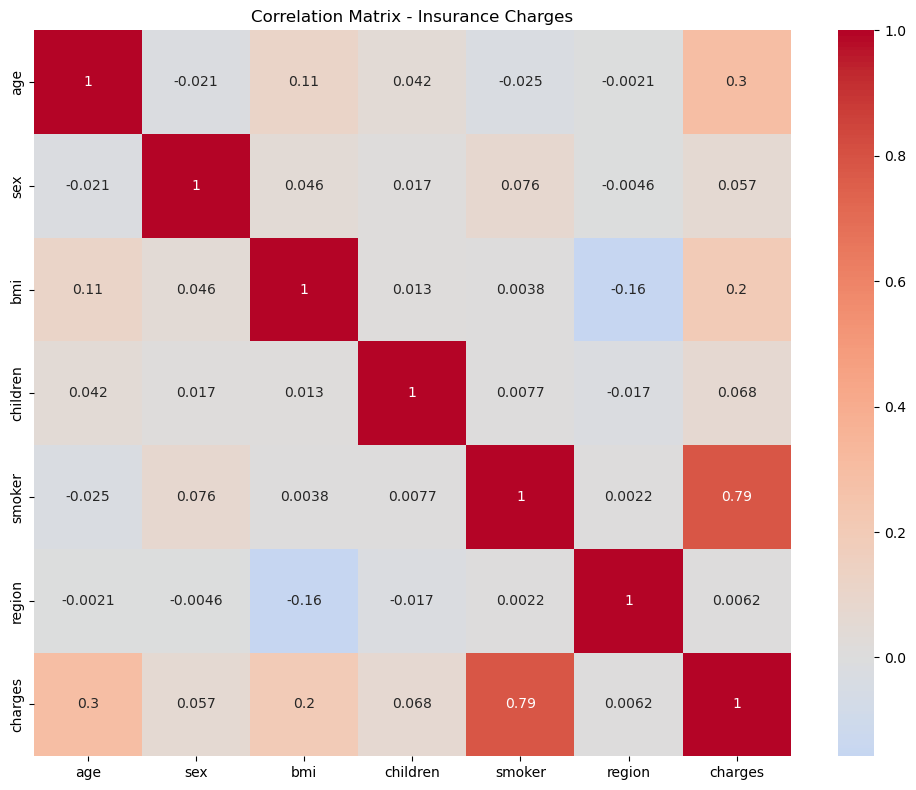

In [ ]:
# Check correlation between variables and charges
# print("Correlation with charges:")
# print(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()['charges'].sort_values(ascending=False))

# Visualize correlation
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# correlation_matrix = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix - Insurance Charges')
# plt.tight_layout()
# plt.show()


In [51]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] = scale.fit_transform(X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

      const       age       sex       bmi  children    smoker    region
0       1.0 -1.438764 -1.010519 -0.453320 -0.908614  1.970587 -1.343905
1       1.0 -1.509965  0.989591  0.509621 -0.078767 -0.507463 -0.438495
2       1.0 -0.797954  0.989591  0.383307  1.580926 -0.507463 -0.438495
3       1.0 -0.441948  0.989591 -1.305531 -0.908614 -0.507463  0.466915
4       1.0 -0.513149  0.989591 -0.292556 -0.908614 -0.507463  0.466915
...     ...       ...       ...       ...       ...       ...       ...
1333    1.0  0.768473  0.989591  0.050297  1.580926 -0.507463  0.466915
1334    1.0 -1.509965 -1.010519  0.206139 -0.908614 -0.507463  1.372326
1335    1.0 -1.509965 -1.010519  1.014878 -0.908614 -0.507463 -0.438495
1336    1.0 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463 -1.343905
1337    1.0  1.551686 -1.010519 -0.261388 -0.908614  1.970587  0.466915

[1338 rows x 7 columns]
                            OLS Regression Results                            
Dep. Variable:                ch

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_38828\716129221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] = scale.fit_transform(X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values)


In [53]:
# 'age', 'sex', 'bmi', 'children', 'smoker', 'region'
scaled = scale.transform([[29, 1, 20, 0, 0, 1]])
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)

[ 1.         -0.72675236  0.98959079 -1.74927139 -0.90861367 -0.5074631
 -0.43849455]
[1458.91388176]
